# Research of apartment sale listings

You have access to data from the Yandex Real Estate service — an archive of apartment sale listings in St. Petersburg and nearby settlements over several years. You need to learn how to determine the market value of real estate objects. To do this, conduct an exploratory data analysis and establish the parameters that influence property prices. This will allow you to build an automated system: it will track anomalies and fraudulent activities.

For each apartment for sale, there are two types of data available. The first is entered by the user, while the second is automatically obtained based on mapping data. For example, the distance to the center, airport, and other locations — this data is automatically retrieved from geoservices. The number of parks and bodies of water is also filled in without user involvement.

## Importing the data file and exploring general information

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# importing data
try:
    data = pd.read_csv('/Users/roman_yakovlev/Downloads/Практикум_DS/Проекты/Project_3_RE_Spb/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
# sorting columns alphabetically
data = data[sorted(data.columns)]

# displaying information on the structure and data in the resulting dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18157 non-null  float64
 1   balcony               12180 non-null  float64
 2   ceiling_height        14504 non-null  float64
 3   cityCenters_nearest   18180 non-null  float64
 4   days_exposition       20518 non-null  float64
 5   first_day_exposition  23699 non-null  object 
 6   floor                 23699 non-null  int64  
 7   floors_total          23613 non-null  float64
 8   is_apartment          2775 non-null   object 
 9   kitchen_area          21421 non-null  float64
 10  last_price            23699 non-null  float64
 11  living_area           21796 non-null  float64
 12  locality_name         23650 non-null  object 
 13  open_plan             23699 non-null  bool   
 14  parks_around3000      18181 non-null  float64
 15  parks_nearest      

In [3]:
# printing first 20 strings
pd.set_option('display.max_columns', None) # for printing all columns
data.head(20)

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images
0,18863.0,NaN,2.70,16028.0,NaN,2019-03-07T00:00:00,8,16.0,NaN,25.00,13000000.0,51.00,Санкт-Петербург,False,1.0,482.0,2.0,755.0,3,False,108.00,20
1,12817.0,2.0,NaN,18603.0,81.0,2018-12-04T00:00:00,1,11.0,NaN,11.00,3350000.0,18.60,посёлок Шушары,False,0.0,NaN,0.0,NaN,1,False,40.40,7
2,21741.0,0.0,NaN,13933.0,558.0,2015-08-20T00:00:00,4,5.0,NaN,8.30,5196000.0,34.30,Санкт-Петербург,False,1.0,90.0,2.0,574.0,2,False,56.00,10
3,28098.0,0.0,NaN,6800.0,424.0,2015-07-24T00:00:00,9,14.0,NaN,NaN,64900000.0,NaN,Санкт-Петербург,False,2.0,84.0,3.0,234.0,3,False,159.00,0
4,31856.0,NaN,3.03,8098.0,121.0,2018-06-19T00:00:00,13,14.0,NaN,41.00,10000000.0,32.00,Санкт-Петербург,False,2.0,112.0,1.0,48.0,2,False,100.00,2
5,NaN,NaN,NaN,NaN,55.0,2018-09-10T00:00:00,5,12.0,NaN,9.10,2890000.0,14.40,городской посёлок Янино-1,False,NaN,NaN,NaN,NaN,1,False,30.40,10
6,52996.0,1.0,NaN,19143.0,155.0,2017-11-02T00:00:00,6,26.0,NaN,14.40,3700000.0,10.60,посёлок Парголово,False,0.0,NaN,0.0,NaN,1,False,37.30,6
7,23982.0,2.0,NaN,11634.0,NaN,2019-04-18T00:00:00,22,24.0,NaN,18.90,7915000.0,NaN,Санкт-Петербург,False,0.0,NaN,0.0,NaN,2,False,71.60,5
8,NaN,NaN,NaN,NaN,189.0,2018-05-23T00:00:00,26,27.0,NaN,8.81,2900000.0,15.43,посёлок Мурино,False,NaN,NaN,NaN,NaN,1,False,33.16,20
9,50898.0,2.0,2.50,15008.0,289.0,2017-02-26T00:00:00,7,9.0,NaN,6.50,5400000.0,43.60,Санкт-Петербург,False,0.0,NaN,0.0,NaN,3,False,61.00,18


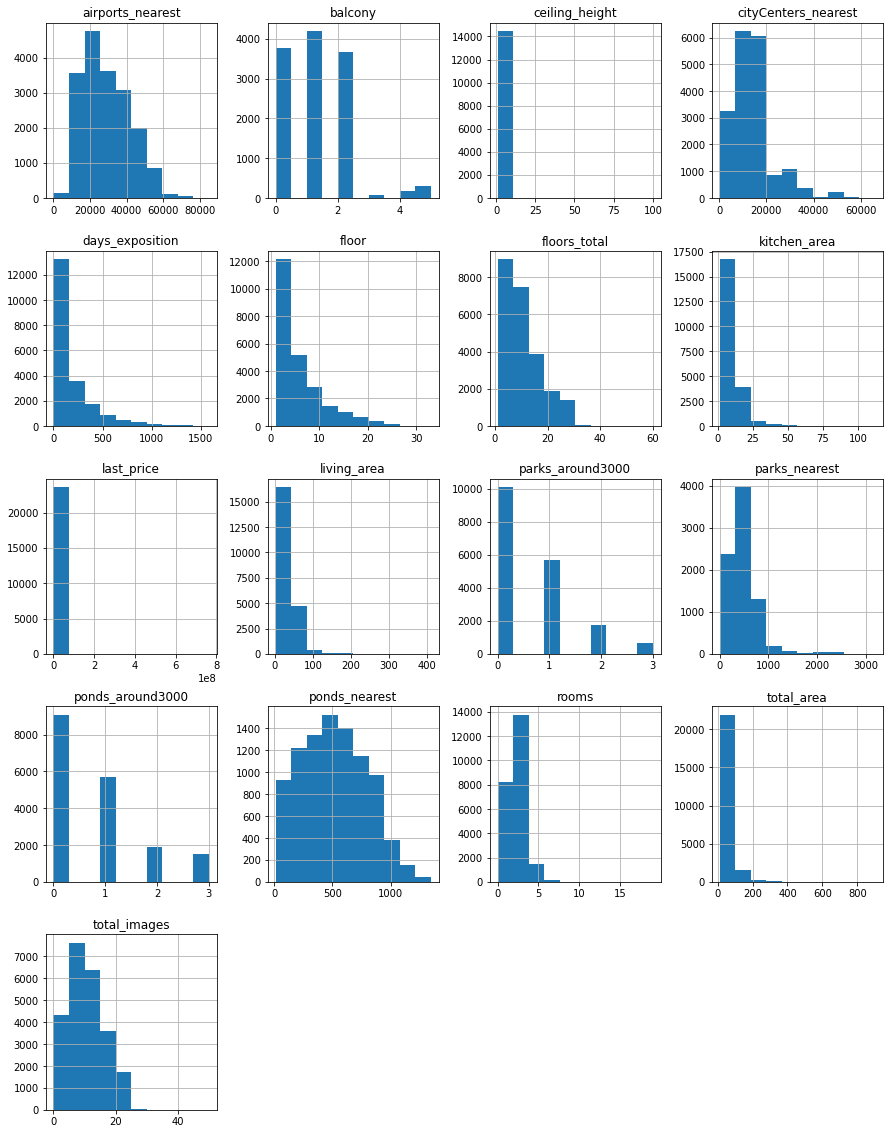

In [4]:
# building a histogram for the numerical parameters of the objects
data.hist(figsize=(15, 20));

**Conclusion**

According to the preliminary assessment of the uploaded data, there are a significant number of missing values in the columns `ceiling_height`, `is_apartment`, as well as in the columns with numerical data obtained from geoservices. The data types of some columns do not match the logic of the data: boolean types are represented as text, and integer data as floating-point numbers. Unusual outliers have been observed in some histograms (`total area`, `price`, `ceiling height`, `kitchen area`). Further analysis should pay attention to this and make adjustments.

## Data preprocessing

### Removing missing values

Calculating the number of missing values by columns:

In [5]:
print(data.isna().sum())

airports_nearest         5542
balcony                 11519
ceiling_height           9195
cityCenters_nearest      5519
days_exposition          3181
first_day_exposition        0
floor                       0
floors_total               86
is_apartment            20924
kitchen_area             2278
last_price                  0
living_area              1903
locality_name              49
open_plan                   0
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
rooms                       0
studio                      0
total_area                  0
total_images                0
dtype: int64


We will replace the missing values in the 'balcony' column with 0, as if the owner did not provide the data, it is likely that there are no balconies. Similarly, for the 'is_apartment' column — apartment owners know this for sure, and if it is not specified, it is likely to be residential real estate.

In [6]:
data['balcony'] = data['balcony'].fillna(0)
data.loc[data['is_apartment'].isna(),'is_apartment'] = False

# checking the number of missing values in the number of balconies and the apartment indicator
print('Missing values in the column with the number of balconies:', data['balcony'].isna().sum())
print('Missing values in the apartment indicator:', data['is_apartment'].isna().sum())

Пропуски по столбцу с количеством балконов: 0
Пропуски по признаку апартаментов: 0


Insignificant missing values have been identified in the floors_total and locality_name parameters. excluding these rows is impractical, as the known parameters of these rows will be useful in identifying dependencies with prices. therefore, we will replace them with 0 and "unknown," respectively:

In [7]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])
data['locality_name'] = data['locality_name'].fillna('не_известен')

# checking the number of missing values 
print('Пропуски по столбцу floors_total:', data['floors_total'].isna().sum())
print('Пропуски по столбцу locality_name:', data['locality_name'].isna().sum())

Пропуски по столбцу floors_total: 0
Пропуски по столбцу locality_name: 0


Checking whether the kitchen area and living area data correlate with the total size of the housing

In [8]:
print('Pearson correlation coefficient for the kitchen area and total area:', data['kitchen_area'].corr(data['total_area']))
print('Pearson correlation coefficient for the living area and total area:', data['living_area'].corr(data['total_area']))

Коэффициент Пирсона по корреляции площади кухни и общей площади: 0.6091211711198318
Коэффициент Пирсона по корреляции жилой площади и общей площади: 0.9395373338721493


In both cases, the correlation is significant, so we will fill in the missing values in the kitchen area and living area columns with the average sizes of these parameters for similar apartments (based on the total area attribute).

In [9]:
# selecting three area columns
data_areas = data[['kitchen_area','living_area','total_area']]

# creating an auxiliary table for the three specified area columns with apartment categories and average values by these categories
area_mean = pd.DataFrame(columns=['kitchen_area','living_area','total_area'])

# calculating the average values of kitchen area and living area for apartments with a total area from 10m² to 200m² in increments of 10m²
for area_segment in range(10,200,10):
   area_mean.loc[area_segment] = round(data_areas[(data_areas['total_area'] >= area_segment) & (data_areas['total_area'] < area_segment+10)].mean(),2)

# separately adding a row with data for apartments with an area greater than 200m² 
# (there are very few of them, and it is impractical to create a separate classification from 200m² to 900m²)
area_mean.loc[200] = round(data_areas[(data_areas['total_area'] >= 200)].mean(),2)

# filling in the missing values with the corresponding average categorical data; in the else case, data for very large apartments will be added
for i,row in area_mean.iterrows():
    if i < 200:
        data.loc[data['kitchen_area'].isna() & (data['total_area']>= i) & (data['total_area'] < i+10), 'kitchen_area'] = row['kitchen_area']
        data.loc[data['living_area'].isna() & (data['total_area']>= i) & (data['total_area'] < i+10), 'living_area'] = row['living_area']
    else:
        data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = row['kitchen_area']
        data.loc[data['living_area'].isna(), 'living_area'] = row['living_area']

# checking missing values
print('Пропуски по столбцу kitchen_area:', data['kitchen_area'].isna().sum())
print('Пропуски по столбцу living_area:', data['living_area'].isna().sum())

Пропуски по столбцу kitchen_area: 0
Пропуски по столбцу living_area: 0


Analyzing the ceiling height column

<AxesSubplot:>

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

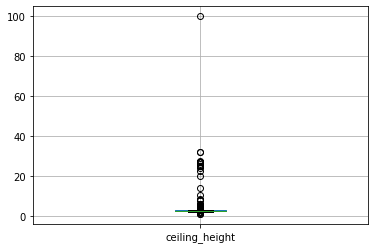

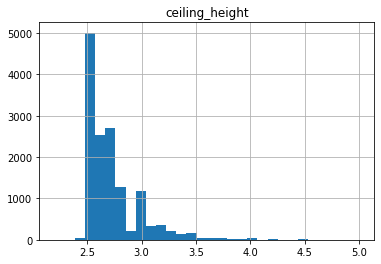

In [10]:
display(data.boxplot('ceiling_height'))
display(data['ceiling_height'].describe())

# checking the distribution of the number of apartments in the typical range of sizes, 
# excluding outliers such as less than 1m and more than 5m — these are clearly incorrect data
data.hist('ceiling_height', bins=30, range=(2.2,5));

The vast majority of apartments have ceiling heights in the expected range of 2.2m to 4m.   
We will also calculate the number of outliers that fall outside the expected range.

In [11]:
# checking the number of clearly incorrect data entries for ceiling heights
print('Number of apartments with ceiling heights less than 2.2m and greater than 5m:', data[(data['ceiling_height'] < 2.2) | (data['ceiling_height'] > 5)]['ceiling_height'].count())

Количество квартир с потолками менее 2.2м и более 5м: 50


There are very few such apartments; it may make sense to replace the outlier data with the average from the entire table.   
We propose to replace the missing values with the average from the table.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(round(data[(data['ceiling_height'] >= 2.2) & (data['ceiling_height'] <= 5)]['ceiling_height'].mean(),2))

Calculating the proportions of missing values for each parameter (column) after handling the missing values:

In [13]:
for column in data.columns:
    print(f'The proportion of missing values for the parameter {column} is: {data[column].isna().sum() / len(data):.2%}')

Доля пропусков по параметру airports_nearest составляет: 23.38%
Доля пропусков по параметру balcony составляет: 0.00%
Доля пропусков по параметру ceiling_height составляет: 0.00%
Доля пропусков по параметру cityCenters_nearest составляет: 23.29%
Доля пропусков по параметру days_exposition составляет: 13.42%
Доля пропусков по параметру first_day_exposition составляет: 0.00%
Доля пропусков по параметру floor составляет: 0.00%
Доля пропусков по параметру floors_total составляет: 0.00%
Доля пропусков по параметру is_apartment составляет: 0.00%
Доля пропусков по параметру kitchen_area составляет: 0.00%
Доля пропусков по параметру last_price составляет: 0.00%
Доля пропусков по параметру living_area составляет: 0.00%
Доля пропусков по параметру locality_name составляет: 0.00%
Доля пропусков по параметру open_plan составляет: 0.00%
Доля пропусков по параметру parks_around3000 составляет: 23.28%
Доля пропусков по параметру parks_nearest составляет: 65.91%
Доля пропусков по параметру ponds_aroun

A significant proportion of missing values has been identified for parameters obtained automatically from geoservices (airports_nearest, cityCenters_nearest, parks_nearest, etc.) and for data from the listing service regarding the duration of the listing (days_exposition). For a correct analysis, it is better to double-check and re-download the necessary data.

The missing values in the corrected columns likely had a random nature.

### Checking and converting data types to correct ones.

Let's take another look at the data types of the columns in the table.

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   airports_nearest      18157 non-null  float64
 1   balcony               23699 non-null  float64
 2   ceiling_height        23699 non-null  float64
 3   cityCenters_nearest   18180 non-null  float64
 4   days_exposition       20518 non-null  float64
 5   first_day_exposition  23699 non-null  object 
 6   floor                 23699 non-null  int64  
 7   floors_total          23699 non-null  float64
 8   is_apartment          23699 non-null  object 
 9   kitchen_area          23699 non-null  float64
 10  last_price            23699 non-null  float64
 11  living_area           23699 non-null  float64
 12  locality_name         23699 non-null  object 
 13  open_plan             23699 non-null  bool   
 14  parks_around3000      18181 non-null  float64
 15  parks_nearest      

Correct data types will use fewer resources during processing and analysis, and it may also be possible to apply appropriate methods when handling this data. Therefore: 
- In the balcony and floors_total columns, the data cannot be fractional by nature, so we will change the data type in these columns from float64 to int64. in the days_exposition, parks_around3000, and ponds_around3000 columns, the nature of the data is the same, but due to the presence of NaN values, we cannot change the type to int64, so we will leave it as float64.
- In the columns with distance data (for example, airports_nearest, cityCenters_nearest, etc.), the data is expressed in whole meters to the object, but these columns also contain NaN, so we will also leave them as float64.
- In the is_apartment column, the data can only take two values, so we can change the data type of this column to bool.
- In the first_day_exposition column, we will convert the date format to the standard format.
- We will convert the columns with float64 data type to float32 to save memory.

In [15]:
# converting the columns from the bullet 1 above to int64
data[['balcony', 'floors_total']] = data[['balcony', 'floors_total']].astype(np.int64)

# converting the column from bullet 3 above to bool
data['is_apartment'] = data['is_apartment'].astype(bool)

# converting the column from bullet 4 above to the standard date format
data['first_day_exposition']= pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

# converting the columns with float64 data to float32
data[['airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'kitchen_area', 'last_price', 'living_area', 'parks_nearest', 'ponds_nearest', 'total_area']] = data[['airports_nearest', 'ceiling_height', 'cityCenters_nearest', 'kitchen_area', 'last_price', 'living_area', 'parks_nearest', 'ponds_nearest', 'total_area']].astype(np.float32)

# for clarity, we will convert the price to millions
data.loc[:,'last_price'] = data.loc[:,'last_price'] / 1000000


### Check for duplicates

Checking the table for obvious duplicates:

In [16]:
data.duplicated().sum()

0

Checking the table for implicit duplicates in the locality_name column, as the same place name may be specified differently.

In [17]:
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'].unique()

array(['санкт-петербург', 'посёлок шушары', 'городской посёлок янино-1',
       'посёлок парголово', 'посёлок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина', 'поселок мурино',
       'деревня фёдоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'посёлок металлострой',
       'посёлок городского типа лебяжье',
       'посёлок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'посёлок аннино',
       'поселок городского типа ефимовский', 'посёлок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'посёлок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', '

In [18]:
# removing references to settlement types and keeping only the names
data['locality_name'] = (
    data['locality_name']
    .str.replace('ё', 'е')
    .replace(['поселок ', 
              'городской поселок ', 
              'деревня ', 
              'поселок городского типа ', 
              'садовое товарищество ', 
              'село ', 
              'садоводческое некоммерческое товарищество ', 
              'коттеджный поселок ', 
              'городской посёлок ', 
              'городского типа ', 
              'городской ', 
              'коттеджный ', 
              'пансионат ', 
              'при железнодорожной станции ', 
              'станции '], '', regex=True)
) 

In [19]:
# to verify, we will display the processed table
data['locality_name'].unique()

array(['санкт-петербург', 'шушары', 'янино-1', 'парголово', 'мурино',
       'ломоносов', 'сертолово', 'петергоф', 'пушкин', 'кудрово',
       'коммунар', 'колпино', 'красный бор', 'гатчина', 'федоровское',
       'выборг', 'кронштадт', 'кировск', 'новое девяткино',
       'металлострой', 'лебяжье', 'сиверский', 'молодцово',
       'кузьмоловский', 'новая ропша', 'павловск', 'пикколово',
       'всеволожск', 'волхов', 'кингисепп', 'приозерск', 'сестрорецк',
       'куттузи', 'аннино', 'ефимовский', 'плодовое', 'заклинье',
       'торковичи', 'первомайское', 'красное село', 'понтонный',
       'сясьстрой', 'старая', 'лесколово', 'новый свет', 'сланцы',
       'путилово', 'ивангород', 'шлиссельбург', 'никольское',
       'зеленогорск', 'сосновый бор', 'оржицы', 'кальтино', 'романовка',
       'бугры', 'рощино', 'кириши', 'луга', 'волосово', 'отрадное',
       'павлово', 'оредеж', 'копорье', 'молодежное', 'тихвин', 'победа',
       'нурма', 'синявино', 'тосно', 'стрельна', 'бокситогорск',

## Adding new columns to the table

We will add columns with additional data to the original table, which are necessary for further analysis.

In [20]:
# adding the price per square meter
data['price_m2'] = round(data['last_price'] / data['total_area'],5)

# adding the day of the week of the listing publication
data['first_day_exposition_sign'] = data['first_day_exposition'].dt.weekday

# adding the month of the listing publication
data['month_exposition'] = data['first_day_exposition'].dt.month

# adding the year of the listing publication
data['year_exposition'] = data['first_day_exposition'].dt.year

# adding the type of the apartment floor
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

# adding the distance to the city center in kilometers
data['cityCenters_km'] = round(data['cityCenters_nearest']/1000)

## Conduct exploratory data analysis

### Let's examine specific parameters

Let's look at the general parameters for the **total area** column:

In [21]:
data['total_area'].describe()

count    23699.000000
mean        60.348648
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900002
max        900.000000
Name: total_area, dtype: float64

And we will build histograms (overall and separately for the extreme ranges):

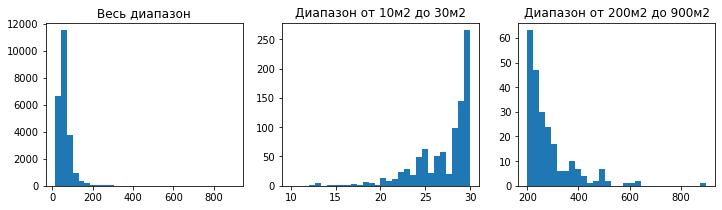

In [22]:
import matplotlib.pyplot as plt

# building a histogram of the total area
plt.figure(figsize=[12, 3])

plt.subplot(1,3,1)
plt.hist(data['total_area'],bins=30)
plt.title('Весь диапазон')

plt.subplot(1,3,2)
plt.hist(data['total_area'],bins=30,range=(10,30))
plt.title('Диапазон от 10м2 до 30м2')

plt.subplot(1,3,3)
plt.hist(data['total_area'],bins=30, range=(200,900))
plt.title('Диапазон от 200м2 до 900м2')

plt.show()

When examining the data for this parameter, questions may arise about the extreme values. however, if we check the rows for apartments with very large areas, other parameters (number of rooms, living area, and kitchen area) correspond as well. Similarly, for very small apartments, it's hard to imagine an apartment of 13m², but the status of 'studio' or the number of rooms (1 room) and the living area corresponding to the total area seem consistent, especially in the old (communal) housing stock of St. Petersburg. we will count the number of rows with extreme values; if their quantity is not significant, then I consider it possible to remove them.

Text(0.5, 1.0, 'Распределение квартир по общей площади')

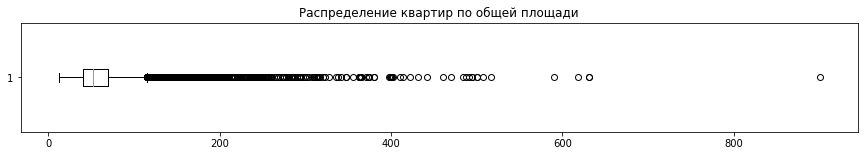

In [23]:
# building a boxplot to assess the outliers
plt.figure(figsize=[15, 2])
plt.boxplot(data['total_area'], vert=False)
plt.title('Distribution of apartments by total area')


Процент, исключенных экстримальных значений по общей площади составил: 5.23%
Распределение квартир по общей площади за исключением экстримальных значений


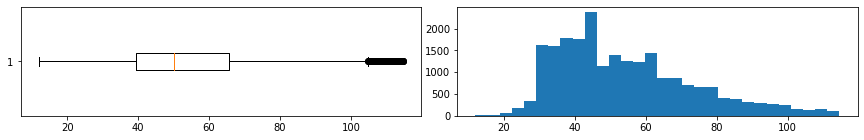

In [24]:
# excluding the outliers identified in the boxplot
Q1 = data['total_area'].quantile(0.25)
Q3 = data['total_area'].quantile(0.75)
IQR = Q3 - Q1
data_area = data.query("total_area < @Q3 + 1.5*@IQR")

# we will build the graph again to visualize the changes
plt.figure(figsize=[15, 2])
plt.subplot(1,4,(1,2))
plt.boxplot(data_area['total_area'], vert=False)

plt.subplot(1,4,(3,4))
plt.hist(data_area['total_area'],bins=30)

# calculating the percentage of excluded data
print(f'The percentage of excluded extreme values for the total area was: {1 - data_area.shape[0] / data.shape[0]:.2%}')
print('Distribution of apartments by total area excluding extreme values')

# updating the dataset for further analysis
data = data_area

With the exclusion of 5% of extreme values for the area, the data became much more uniform.

Let's look at the general parameters for the **living area** column:

In [25]:
data['living_area'].describe()

count    22459.000000
mean        31.095379
std         13.414041
min          2.000000
25%         18.299999
50%         29.799999
75%         40.000000
max        101.000000
Name: living_area, dtype: float64

And we will build histograms (overall and separately for the extreme ranges):

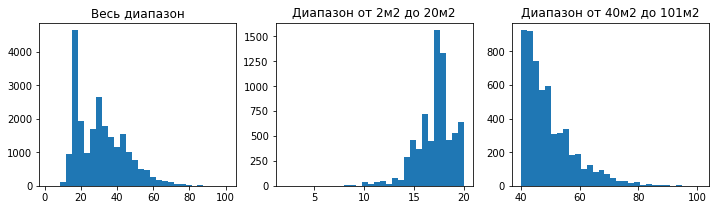

In [26]:
# building a histogram of the living area
plt.figure(figsize=[12, 3])

plt.subplot(1,3,1)
plt.hist(data['living_area'],bins=30)
plt.title('Весь диапазон')

plt.subplot(1,3,2)
plt.hist(data['living_area'],bins=30,range=(2,20))
plt.title('Диапазон от 2м2 до 20м2')

plt.subplot(1,3,3)
plt.hist(data['living_area'],bins=30, range=(40,101))
plt.title('Диапазон от 40м2 до 101м2')

plt.show()

Large values of living area correspond to larger apartments by total area, but critically small values (2-3m²) may contain errors. At the same time, checking public sources shows the presence of such apartments with small living areas (from 5-8m²), so it is proposed not to exclude these objects—the other parameters (total area, kitchen area, distances to objects, price) appear reliable and will be useful for analysis.

Let's look at the general parameters for the **kitchen area** column:

In [27]:
data['kitchen_area'].describe()

count    22459.000000
mean         9.841805
std          4.200548
min          1.300000
25%          7.000000
50%          9.000000
75%         11.100000
max         55.700001
Name: kitchen_area, dtype: float64

And we will build histograms (overall and separately for the extreme ranges):

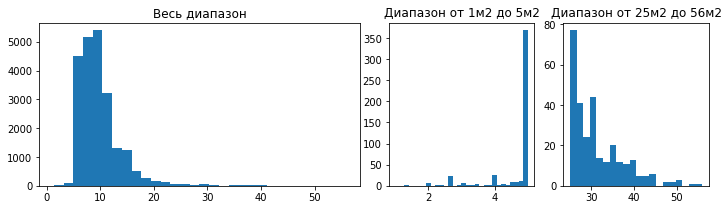

In [28]:
# building a histogram of the kitchen area
plt.figure(figsize=[12, 3])

plt.subplot(1,4,(1,2))
plt.hist(data['kitchen_area'],bins=30)
plt.title('Весь диапазон')

plt.subplot(1,4,3)
plt.hist(data['kitchen_area'],bins=30,range=(1,5))
plt.title('Диапазон от 1м2 до 5м2')

plt.subplot(1,4,4)
plt.hist(data['kitchen_area'],bins=20, range=(25,56))
plt.title('Диапазон от 25м2 до 56м2')

plt.show()

In [29]:
# counting the number of extreme values
print('Number of extreme values:', data[(data['kitchen_area'] < 5) | (data['kitchen_area'] > 60)]['kitchen_area'].count())
print(f'Proportion of extreme values: {data[(data["kitchen_area"] < 5) | (data["kitchen_area"] > 60)]["kitchen_area"].count()/ len(data):.2%}')

Количество экстремальных значений: 128
Доля экстремальных значений: 0.57%


Similarly to the previous points, the number of extreme values for kitchen area is extremely insignificant. At the same time, checking public sources shows the presence of such apartments with very small kitchen areas (from 1m²), so it is proposed not to exclude these objects—the other parameters (total area, kitchen area, distances to objects, price) appear reliable and will be useful for analysis.

Let's look at the conditions for the **price** of the objects:

In [30]:
pd.options.display.float_format ='{:,.2f}'.format
data['last_price'].describe()

count   22,459.00
mean         5.31
std          3.40
min          0.01
25%          3.36
50%          4.50
75%          6.30
max         82.00
Name: last_price, dtype: float64

and we will build a histogram:

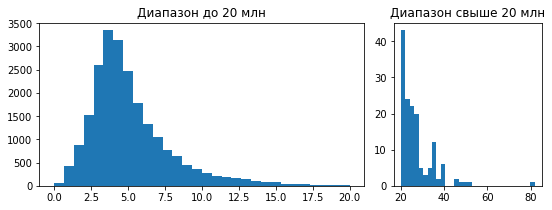

In [31]:
# building a histogram of the sale price
plt.figure(figsize=[9, 3])

plt.subplot(1,3,(1,2))
plt.hist(data['last_price'],bins=30, range=(0,20))
plt.title('Диапазон до 20 млн')


plt.subplot(1,3,3)
plt.hist(data['last_price'],bins=30,range=(20,82))
plt.title('Диапазон свыше 20 млн')

plt.show()


Obviously, there are significant outliers in the price. let's build a boxplot to assess the outliers:

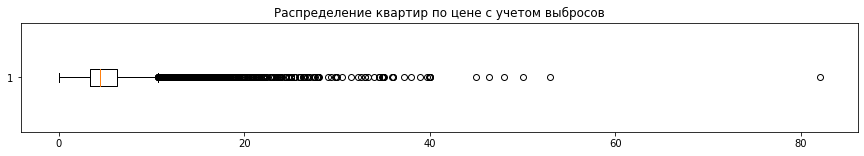

In [32]:
plt.figure(figsize=[15, 2])
plt.boxplot(data['last_price'], vert=False)
plt.title('Distribution of apartments by price, taking into account outliers');


Процент, исключенных экстримальных значений по цене составил: 5.97%
Распределение квартир по цене за исключением экстримальных значений


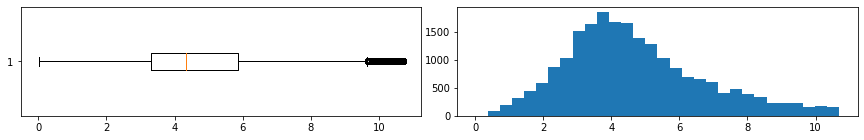

In [33]:
# let's exclude the outliers identified in the boxplot
Q1 = data['last_price'].quantile(0.25)
Q3 = data['last_price'].quantile(0.75)
IQR = Q3 - Q1
data_price = data.query("last_price < @Q3 + 1.5*@IQR")

# let's build the graph again for a clear view of the changes
plt.figure(figsize=[15, 2])
plt.subplot(1,4,(1,2))
plt.boxplot(data_price['last_price'], vert=False)

plt.subplot(1,4,(3,4))
plt.hist(data_price['last_price'],bins=30)

# let's calculate the percentage of excluded data
print(f'The percentage of excluded extreme values for price amounted to: {1 - data_price.shape[0] / data.shape[0]:.2%}')
print('Distribution of apartments by price, excluding extreme values')

# updating the dataset for further analysis
data = data_area


After excluding extreme values, the distribution of data became more uniform, with data losses amounting to less than 6%, which is acceptable.

Let's look at the conditions for the **number of rooms**:

In [34]:
data['rooms'].describe()

count   22,459.00
mean         1.95
std          0.90
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64

and we will build a histogram:

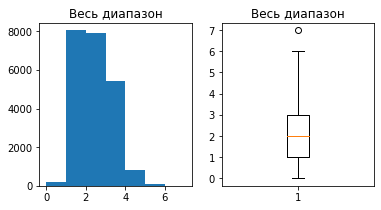

In [35]:
# let's build a histogram and a boxplot for the number of rooms to assess the distribution and outliers
plt.figure(figsize=[6, 3])

plt.subplot(1,2,1)
plt.hist(data['rooms'],bins=7)
plt.title('The entire range')

plt.subplot(1,2,2)
plt.boxplot(data['rooms'])
plt.title('The entire range')

plt.show()

The overwhelming majority of apartments have up to 3 rooms, and no extreme values corresponding to very large apartments have been identified, considering the earlier filtering of the dataset by total area and price.

Let's look at the conditions for **ceiling height** and build a histogram:

count   22,459.00
mean         2.74
std          1.01
min          1.00
25%          2.60
50%          2.73
75%          2.73
max        100.00
Name: ceiling_height, dtype: float64

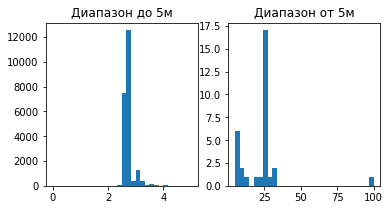

In [36]:
display(data['ceiling_height'].describe())

# let's build a histogram for ceiling height
plt.figure(figsize=[6, 3])

plt.subplot(1,2,1)
plt.hist(data['ceiling_height'],bins=30, range=(0,5))
plt.title('The range is up to 5m')


plt.subplot(1,2,2)
plt.hist(data['ceiling_height'],bins=30,range=(5,100))
plt.title('The range is from 5m')

plt.show()

The overwhelming majority of ceilings are of standard size, but clearly erroneous outliers (with ceilings of several tens of meters) slightly distort the histogram. Let's check the rows with these erroneous data and correct or remove them.

In [37]:
data[(data['ceiling_height']>5) | (data['ceiling_height']<=1.5)]

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,price_m2,first_day_exposition_sign,month_exposition,year_exposition,floor_type,cityCenters_km
355,NaN,2,25.00,NaN,259.00,2018-07-12,2,5,False,9.09,3.60,32.00,гатчина,False,NaN,NaN,NaN,NaN,2,False,55.20,17,0.07,3,7,2018,другой,NaN
3148,NaN,0,32.00,NaN,NaN,2018-11-12,2,3,False,8.00,2.90,53.00,волхов,False,NaN,NaN,NaN,NaN,3,False,75.00,14,0.04,0,11,2018,другой,NaN
3474,NaN,0,8.00,NaN,125.00,2018-03-16,2,5,False,7.30,1.40,15.30,нурма,False,NaN,NaN,NaN,NaN,1,False,30.00,3,0.05,4,3,2018,другой,NaN
4643,"12,016.00",1,25.00,"13,256.00",181.00,2018-02-01,2,9,False,7.00,4.30,30.00,санкт-петербург,False,1.00,658.00,1.00,331.00,2,False,45.00,0,0.10,3,2,2018,другой,13.00
4876,NaN,2,27.00,NaN,28.00,2017-09-27,17,25,False,6.19,3.00,17.00,мурино,True,NaN,NaN,NaN,NaN,0,False,25.00,7,0.12,2,9,2017,другой,NaN
5076,"29,686.00",0,24.00,"8,389.00",7.00,2018-10-03,1,5,True,5.50,3.85,19.50,санкт-петербург,False,3.00,397.00,1.00,578.00,1,False,30.50,0,0.13,2,10,2018,первый,8.00
5246,NaN,2,27.00,NaN,540.00,2017-10-13,3,5,False,9.00,2.50,30.00,мины,False,NaN,NaN,NaN,NaN,2,False,54.00,0,0.05,4,10,2017,другой,NaN
5669,"28,981.00",2,26.00,"10,912.00",267.00,2017-08-08,3,9,False,7.00,4.40,21.30,санкт-петербург,False,1.00,305.00,0.00,NaN,2,False,50.00,4,0.09,1,8,2017,другой,11.00
5712,NaN,0,1.20,NaN,248.00,2017-08-14,1,2,False,5.20,1.50,27.50,мга,False,NaN,NaN,NaN,NaN,2,False,42.80,5,0.04,0,8,2017,первый,NaN
5807,"18,732.00",5,27.00,"20,444.00",38.00,2019-01-09,13,36,False,12.00,8.15,41.00,санкт-петербург,False,0.00,NaN,3.00,80.00,2,False,80.00,17,0.10,2,1,2019,другой,20.00


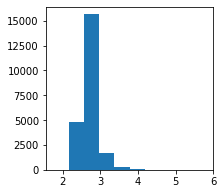

In [38]:
# ceilings of 20-32 meters are erroneous and likely correspond to more typical values of 2-3.2m.
# similarly, ceilings of 8-8.3m are likely due to a typo and correspond to 2.8m, as this is also one of the standards.
# ceilings from 5 to 6 meters are likely to be real since these apartments are exceptionally expensive—the stated ceiling height may correspond to reality.
# ceilings with parameters that do not resemble any standard—10, 14, 100 meters, as well as those less than 1.5—will be replaced with the average value, as was done when handling    # missing values, to avoid losing other correct information for analysis.

data.loc[(data['ceiling_height']>=20) & (data['ceiling_height']<=32), 'ceiling_height'] /= 10
data.loc[(data['ceiling_height']>=8) & (data['ceiling_height']<=8.3), 'ceiling_height'] = 2.8
data.loc[(data['ceiling_height']>=10) | (data['ceiling_height']<=1.5), 'ceiling_height'] = round(data[(data['ceiling_height'] >= 2.2) & (data['ceiling_height'] <= 5)]['ceiling_height'].mean(),2)

# let's display the histogram after data processing
plt.figure(figsize=[3, 3])
plt.hist(data['ceiling_height'],bins=10)

plt.show()

Let's take a look at the data on the **type of floor of the apartment**:

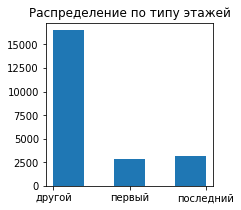

Доля первых этажей в общей выборке: 12.61%
Доля первых этажей в общей выборке: 14.04%


In [39]:
#Построим гистограмму по типу этажей 
plt.figure(figsize=[3, 3])

#plt.subplot(1,2,1)
plt.hist(data['floor_type'],bins=5)
plt.title('Распределение по типу этажей')

plt.show()

#посчитаем доли "первых" и "последних" этажей от общей выборки
print(f'The proportion of ground floors in the overall sample: {data[data["floor_type"]=="первый"]["floor_type"].count()/len(data):.2%}')
print(f'The proportion of top floors in the overall sample: {data[data["floor_type"]=="последний"]["floor_type"].count()/len(data):.2%}')

There are no remarks about the data; the first and last floors account for 12% and 14% of the total sample, respectively.

Let's take a look at the data on the **total number of floors** in the buildings where the apartments are for sale:

count   22,459.00
mean        10.79
std          6.63
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         60.00
Name: floors_total, dtype: float64

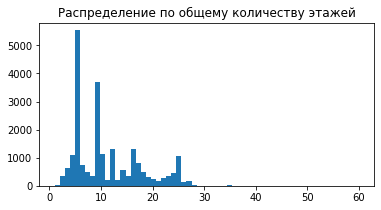

In [40]:
display(data['floors_total'].describe())

# let's plot a histogram of the total number of floors
plt.figure(figsize=[6, 3])

plt.hist(data['floors_total'],bins=60)
plt.title('Distribution of the total number of floors')

plt.show()

In [41]:
data[data['floors_total']>30]

,airports_nearest,balcony,ceiling_height,cityCenters_nearest,days_exposition,first_day_exposition,floor,floors_total,is_apartment,kitchen_area,last_price,living_area,locality_name,open_plan,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,rooms,studio,total_area,total_images,price_m2,first_day_exposition_sign,month_exposition,year_exposition,floor_type,cityCenters_km
397,"18,732.00",1,2.73,"20,444.00",11.00,2018-03-22,28,36,False,18.70,5.99,21.40,санкт-петербург,False,0.00,NaN,3.00,80.00,2,False,54.00,15,0.11,3,3,2018,другой,20.00
871,"18,732.00",0,2.73,"20,444.00",169.00,2017-11-16,23,35,False,11.70,7.78,40.50,санкт-петербург,False,0.00,NaN,3.00,80.00,2,False,75.00,14,0.10,3,11,2017,другой,20.00
1060,"18,732.00",2,2.73,"20,444.00",281.00,2015-11-06,15,35,False,20.50,5.20,39.00,санкт-петербург,False,0.00,NaN,3.00,80.00,2,False,50.00,10,0.10,4,11,2015,другой,20.00
1697,"18,732.00",0,2.65,"20,444.00",410.00,2018-02-08,23,34,False,6.19,3.55,18.00,санкт-петербург,False,0.00,NaN,3.00,80.00,1,False,28.00,11,0.13,3,2,2018,другой,20.00
1917,"18,732.00",0,2.80,"20,444.00",NaN,2017-11-17,30,35,False,13.00,10.15,34.40,санкт-петербург,False,0.00,NaN,3.00,80.00,2,False,74.00,13,0.14,4,11,2017,другой,20.00
2253,"67,763.00",0,2.88,"49,488.00",166.00,2018-06-28,4,60,False,7.40,3.80,27.40,кронштадт,False,2.00,342.00,3.00,614.00,2,False,45.50,12,0.08,3,6,2018,другой,49.00
2966,"18,732.00",0,2.73,"20,444.00",50.00,2017-08-08,15,35,False,10.40,4.30,14.00,санкт-петербург,False,0.00,NaN,3.00,80.00,1,False,37.00,9,0.12,1,8,2017,другой,20.00
4855,"18,627.00",0,2.80,"20,339.00",537.00,2017-06-22,4,35,False,13.00,5.50,22.00,санкт-петербург,False,1.00,609.00,3.00,145.00,1,False,50.00,12,0.11,3,6,2017,другой,20.00
5749,"18,732.00",2,2.80,"20,444.00",198.00,2017-08-30,26,35,False,6.19,3.59,16.58,санкт-петербург,True,0.00,NaN,3.00,80.00,0,False,25.00,20,0.14,2,8,2017,другой,20.00
5807,"18,732.00",5,2.70,"20,444.00",38.00,2019-01-09,13,36,False,12.00,8.15,41.00,санкт-петербург,False,0.00,NaN,3.00,80.00,2,False,80.00,17,0.10,2,1,2019,другой,20.00


The histogram shows that the majority of apartments are in buildings with historically popular floor counts: 5, 9, 16, and 25 floors. Outliers include a building with 60 floors in Kronstadt, which is clearly erroneous, and 52 floors in St. Petersburg (there are no such tall residential buildings in St. Petersburg, especially with apartments priced at 4 million rubles). We will correct these values to 6 and 25 floors, respectively, while leaving the rest without comments.

count   22,459.00
mean        10.78
std          6.62
min          1.00
25%          5.00
50%          9.00
75%         16.00
max         37.00
Name: floors_total, dtype: float64

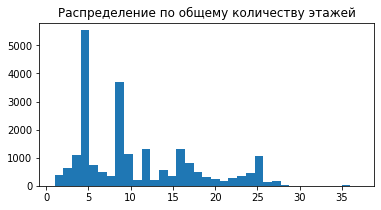

In [42]:
data.loc[data['floors_total']==60, 'floors_total'] = 6
data.loc[data['floors_total']==52, 'floors_total'] = 25

display(data['floors_total'].describe())

#выведем распределение еще раз
plt.figure(figsize=[6, 3])
plt.hist(data['floors_total'],bins=35)
plt.title('Distribution by total number of floors')
plt.show()

Let's take a look at the data on **the distance to the city center in meters**:

count   16,985.00
mean    14,620.74
std      8,511.90
min        208.00
25%     10,085.00
50%     13,354.00
75%     16,518.00
max     65,968.00
Name: cityCenters_nearest, dtype: float64

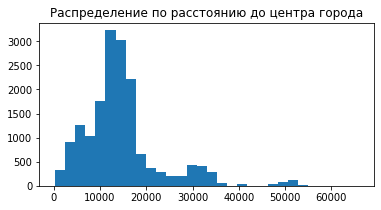

In [43]:
display(data['cityCenters_nearest'].describe())

#Построим гистограмму 
plt.figure(figsize=[6, 3])

plt.hist(data['cityCenters_nearest'],bins=30)
plt.title('Distribution by distance to the city center:')

plt.show()

There are no significant outliers; most apartments (over 75%) are located within 20 km of the city center.  
It is necessary to check with colleagues and clarify/retrieve the values for this parameter, as data is missing for 23% of the apartments.

Let's take a look at the data on **the distance to the nearest park** in meters:

count   7,278.00
mean      494.98
std       343.78
min         1.00
25%       289.00
50%       458.00
75%       617.00
max     3,190.00
Name: parks_nearest, dtype: float64

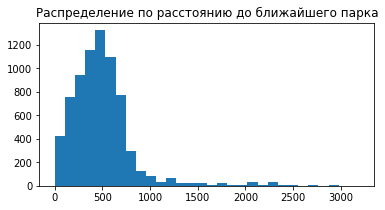

In [44]:
display(data['parks_nearest'].describe())

#Построим гистограмму 
plt.figure(figsize=[6, 3])

plt.hist(data['parks_nearest'],bins=30)
plt.title('Distribution by the distance to the nearest park:')

plt.show()

There are no significant outliers; most apartments (over 75%) are located within 600 meters of the nearest park. The maximum distance is 3.2 km, which may characterize the city and its surroundings as a fairly "green" area. It is important to note that the data on this parameter is very limited, with information available for only 34% of apartments—it's necessary to check with colleagues and clarify/download the values for this parameter.

**Conclusion**:

The total area in our sample ranges from 12 to 900 m², with a mean of 60 m² and a median of 52 m². The data distribution follows a Poisson distribution. The majority of apartments have an area between 20 and 70 m², while the outliers consist of several hundred apartments with particularly large areas (over 100 m²)—these have been identified and excluded from the dataset (the main sample remained intact, with the exclusion comprising about 5%).

The living area is distributed similarly to the total area, ranging from 18 to 42 m², with significant outliers corresponding to larger apartments. The kitchen areas also correspond to this group, ranging from 7 to 12 m².

Real estate prices have a mean value of 6.5 million rubles, a median of 4.6 million rubles, and 75% are priced up to 7 million rubles. Significant outliers have been identified and excluded for more accurate analysis and forecasting, with the volume of excluded data amounting to about 5%, which is acceptable.

The number of rooms, after cleaning the data regarding area and price parameters, ranges from 1 to 7. There are mostly one- and two-room apartments, with erroneous outliers reporting 0 rooms—these are likely studios or one-room apartments. If necessary, to avoid excluding these outliers, they can be adjusted according to similar apartments with total areas.

The average ceiling height is 2.77 m, with a median of 2.65 m. The outliers have been corrected—more significant values correspond to premium segment apartments (ceilings from 5 to 6 meters).

Regarding floor types, 25% of the apartments in listings are extreme options—first and last floors—which is unusual but may reflect market specifics: these options differ in quality from intermediate floors and are therefore more frequently listed. The most common total floor counts are for buildings from historically popular construction—5, 9, 16, and 25 floors.

The apartments are unevenly distributed concerning their distance to the city center, with the overwhelming majority located within 20 km. The average distance to the nearest park is 500 m (it is important to note that the subsample regarding parks is quite small—there are many missing data).

All data contain inadequate values, such as 0 rooms, ceiling heights of 1 or 100 meters, and an apartment priced at 12,190 rubles. For these inadequate values, it is better to consult with the employees who provided us with the data sample. For the overall study of the data, we will not remove these outlier values.

### Analysis of apartment sales speed

Let's build a histogram and clarify the mean and median for the column representing the number of days an apartment listing has been active:

count   19,594.00
mean       175.08
std        213.10
min          1.00
25%         44.00
50%         92.00
75%        223.00
max      1,580.00
Name: days_exposition, dtype: float64

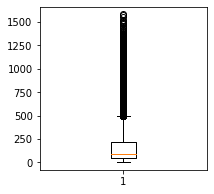

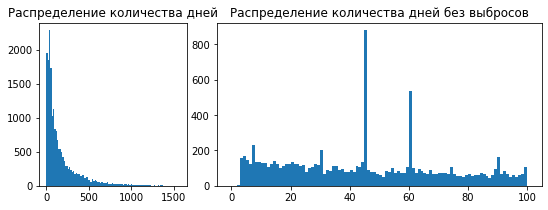

Медиана по количеству дней: 92
Среднее по количеству дней: 175


In [45]:
# look at the general characteristics of the dataset regarding the listing days
display(data['days_exposition'].describe())
 
# create a boxplot to evaluate the outliers
plt.figure(figsize=[3, 3])
plt.boxplot(data[~data['days_exposition'].isna()]['days_exposition'])

# plot a histogram 
plt.figure(figsize=[9, 3])

plt.subplot(1,3,1)
plt.hist(data['days_exposition'],bins=100)
plt.title('Distribution of the number of days')

# create a separate histogram excluding outliers based on the duration
plt.subplot(1,3,(2,3))
plt.hist(data['days_exposition'],bins=100,range=(0,100))
plt.title('Distribution of the number of days without outliers')

plt.show()

print('Median of the number of days:',round(data['days_exposition'].median()))
print('Mean of the number of days:', round(data['days_exposition'].mean()))

**Conclusion**

According to the histogram, we have a Poisson distribution. The average value is 181 days, while the median is 95 days. By creating a histogram with values from 0 to 100 days and 100 bins, we identified outliers at 45, 60, 7, 30, and 90 days—these are the most common durations before an advertisement is removed.

According to open sources regarding the rules for posting ads on Yandex Realty, it turns out that after these periods, the ad is considered outdated and is automatically removed (https://yandex.ru/support/realty/owner/home/add-ads-housing.html). It would be better to remove these values from the sample.

We also need to clarify which number of days should be considered normal and which should be considered outliers at this moment before data cleaning. Based on the describe method, the interquartile range is from 45 to 232 days, while the boxplot method shows that our range extends from the minimum value to about 500 days. Therefore, we do not have unjustifiably short durations, while durations of 500 days and above are considered unjustifiably long. Thus, normal values lie between 1 and 500 days. Additionally, it is worth noting that after removing the outliers at 45, 60, 7, 30, and 90 days, the normal duration may be adjusted.

### Let’s identify the factors that most influence the overall property price.

Let’s build a correlation matrix for the price based on the area (total, living, kitchen), number of rooms, floor, and listing date (day, month, year).

Коэффициент корреляции цены с total_area: 0.68


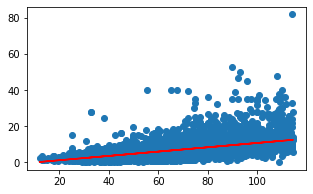

Коэффициент корреляции цены с living_area: 0.56


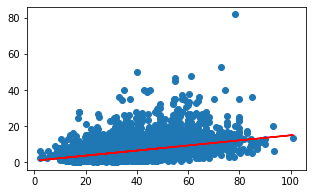

Коэффициент корреляции цены с kitchen_area: 0.53


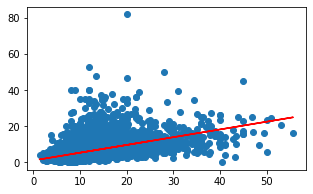

График зависимости цены с rooms:


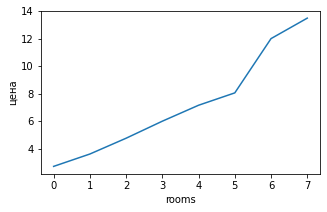

График зависимости цены с floor_type:


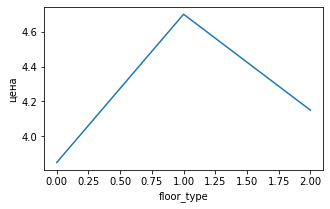

График зависимости цены с first_day_exposition_sign:


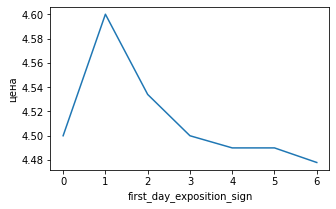

График зависимости цены с month_exposition:


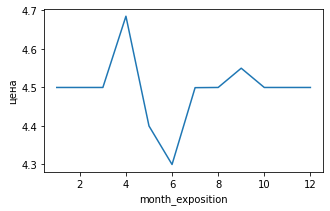

График зависимости цены с year_exposition:


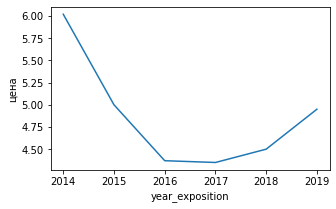

In [46]:
# select the needed columns into a separate table
data_price = data.loc[:,['last_price','total_area','living_area','kitchen_area','rooms','floor_type','first_day_exposition_sign','month_exposition','year_exposition']]

# сonvert the string labels for categories in the 'floor_type' column to numeric for running the Pearson coefficient calculation function
data_price.loc[(data_price['floor_type']=='первый'), 'floor_type'] = 0
data_price.loc[(data_price['floor_type']=='другой'), 'floor_type'] = 1
data_price.loc[(data_price['floor_type']=='последний'), 'floor_type'] = 2
data_price.loc[:,'floor_type'] = data_price.loc[:,'floor_type'].astype(np.int64)


for column in data_price:
    # аor quantitative parameters, we will create a plot with points and a trend line
    if column in ['total_area','living_area','kitchen_area']:
        print(f'Коэффициент корреляции цены с {column}: {data["last_price"].corr(data_price[column]):.2}')
        x = data_price[column]
        y = data_price['last_price']
        plt.figure(figsize=[5, 3])
        plt.scatter(x, y)
        z = np.polyfit(x, y,1)
        p = np.poly1d(z)
        plt.plot(x, p(x),'r')
        plt.show()

    # for categorical parameters, we will create a plot with a line by medians of corresponding values
    elif column in ['rooms','floor_type','first_day_exposition_sign','month_exposition','year_exposition']:
        print(f'Price dependence plot with {column}:')
        pivot_table_ = data_price.pivot_table(index = column, values = 'last_price', aggfunc = ['count', 'median'])
        pivot_table_.columns = ['count', 'median']

        plt.figure(figsize=[5, 3])
        plt.plot(pivot_table_['median'])
        plt.xlabel(column)
        plt.ylabel('цена')
        plt.show()

**Conclusion**

For the first three parameters (total area, living area, and kitchen area), we can confirm their connection with price (correlation coefficients are 0.65-0.48 respectively). This is natural, as the size of an apartment is one of the most important factors in determining its cost (although the coefficient indicates that it is not the only factor).

The relationship with the number of rooms is also positive but weak (0.36), which can be indirectly linked to the area — the more rooms there are, the larger the area tends to be, and in such cases, the connection between price and area plays a bigger role than the direct relation to the number of rooms. An outlier on the graph was formed by one very expensive apartment with 12 rooms.

For floor type (with minimal categorization), the relationship is weak (0.05), but it's worth noting that top floors are more valued compared to bottom ones (likely due to the view), while all intermediate floors have advantages of both extreme options without their disadvantages (apartments on floors 20-24 in a 25-story building also offer good views but do not carry the risks associated with roof leaks or unauthorized access to attics).

There is no correlation between price and the day, month, and year when the listing was posted. However, we observe that listings posted on Tuesdays and in April had higher prices compared to those posted on Sundays and in June. The advertised prices decreased from 2014 to 2016 and started rising again from 2018 to 2019. Therefore, these factors are likely statistically insignificant or have a nonlinear relationship.

### Calculation and analysis of the average price per square meter in the Top 10 populated areas with the highest number of listings

Топ-10 населенных пунктов по стоимости 1м2 в Санкт-Петербурге и Ленинградской области:


,count,mean
locality_name,,
санкт-петербург,14579,"110,737.49"
мурино,590,"86,087.59"
кудрово,471,"95,290.68"
шушары,437,"78,705.15"
всеволожск,395,"68,673.54"
пушкин,347,"101,960.37"
колпино,336,"75,369.94"
парголово,326,"90,332.55"
гатчина,304,"68,919.61"


Самый дорогой м2 жилья находится в:


,count,mean
locality_name,,
санкт-петербург,14579,"110,737.49"


Самый дешевый м2 жилья находится в:


,count,mean
locality_name,,
выборг,228,"58,225.66"


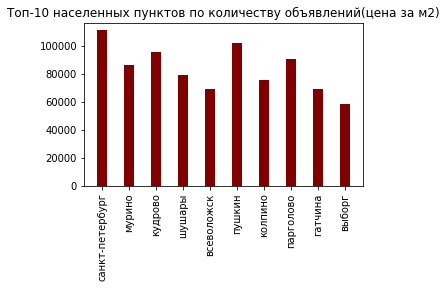

In [47]:
locality_m2_pivot_table = data.pivot_table(index = 'locality_name', values = 'price_m2', aggfunc=['count', 'mean'])
locality_m2_pivot_table.columns = ['count', 'mean']

locality_m2_pivot_table.loc[:,'mean'] = locality_m2_pivot_table.loc[:,'mean'] * 1000000

locality_m2_pivot_table = locality_m2_pivot_table.sort_values('count', ascending = False).head(10)
print('Top-10 populated areas by cost per square meter in saint petersburg and the saint petersburg region:')
display(locality_m2_pivot_table)

# highest cost
print('The most expensive square meter of housing is in:')
display(locality_m2_pivot_table[locality_m2_pivot_table["mean"]==locality_m2_pivot_table["mean"].max()])
# lowest cost
print('The most cheap square meter of housing is in:')
display(locality_m2_pivot_table[locality_m2_pivot_table['mean']==locality_m2_pivot_table['mean'].min()])

# build a plot for visualization
plt.figure(figsize=[5, 3])
plt.bar(locality_m2_pivot_table.index,locality_m2_pivot_table['mean'], color ='maroon', width = 0.4)
plt.xticks(rotation=90) 
plt.title('Top-10 populated areas by number of listings (price per square meter)')

plt.show()

**Conclusion**

The highest cost per square meter among the top 10 populated areas with the largest number of listings is in Saint Petersburg, and the lowest cost is in Vyborg.

### Calculation of average housing cost in Saint Petersburg at different distances from the center

,count,mean
cityCenters_km,,
0.00,17,18.84
1.00,136,10.57
2.00,220,10.32
3.00,276,8.77
4.00,535,9.09
5.00,718,9.46
6.00,485,8.75
7.00,346,8.79
8.00,534,7.68


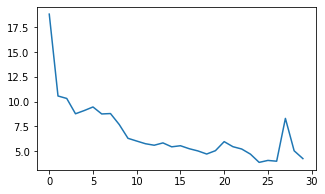

In [48]:
# select data only for Saint Petersburg
data_spb = data.query('locality_name == "санкт-петербург"')

# calculate the average cost for each kilometer of distance from the center
center_price_pivot_table = data_spb.pivot_table(index = 'cityCenters_km', values = 'last_price', aggfunc=['count', 'mean'])
center_price_pivot_table.columns = ['count', 'mean']
display(center_price_pivot_table)

plt.figure(figsize=[5, 3])
plt.plot(center_price_pivot_table['mean'])
plt.show()

**Conclusion**

As expected, the cost of apartments decreases with distance from the center. We observe a peak from 4 to 7 km, which is likely due to historical districts that are not in the city center but are still highly valued. There is also a peak at the maximum distance (27-29 km), which is probably due to an outlier with a small number of listings (a few apartments in a single premium-class new building).

## Main conclusion

Initially, we loaded the dataset and analyzed the first 20 rows, general information about the array, and histograms for all numeric parameters. After the initial analysis, we preprocessed the data by handling missing values where necessary, removing implicit duplicates in place names, and converting data types as needed.

We then calculated and added to the table the price per square meter of housing, extracted days of the week, months, and years from listing dates, categorized floor types, and calculated distances to the city center in kilometers.

We examined the following parameters for outliers: total area, living area, kitchen area, price, number of rooms, ceiling height, type of apartment floor, total number of floors in buildings, distance to the city center, and distance to the nearest park. Anomalies were identified in these parameters. When studying the time it takes to sell apartments, we found that a significant number of listings were automatically removed from Yandex Real Estate, and their removal dates cannot be considered sale dates. Therefore, when analyzing average selling times, these values were not taken into account.

No anomalies were found in area data; most listings are for small and medium-sized apartments (with total areas ranging from 25 to 70 m²), with peaks on typical values (kitchen sizes of 6-12 m²). Price data is also consistent, with over 75% of apartments priced at less than 7 million rubles, while very expensive apartments (over 20 million rubles) are rare (less than 1,000 listings).

The number of rooms shows that most apartments have up to three rooms, with extreme values corresponding to very large apartments and comprising only a few dozen examples. Ceiling heights show over 75% at 2.77 meters, close to the standard for typical historical construction (2.8 m), although anomalies due to typos or incorrect data were corrected appropriately or replaced with average values.

In terms of floor types, one-quarter of listings are on extreme floors (first and last floors). As for building height, peaks in listings occur for buildings with 5, 9, 16, and 25 floors. Regarding distances to the city center and nearest park, over 75% of apartments are within 20 km from the central city, while the average distance to a nearby park is around 500 meters (importantly, there is a small subsample for parks with many missing data points).

Using box plots, we found that normal selling times for apartments range from 1 to 500 days (excluding adjustments for automatic listing removals). We concluded that apartment price is most influenced by area and indirectly by the number of rooms (as an area-related factor), while floor type, building height, and day, month, or year of listing are virtually unrelated to price. A notable observation was that in 2016-2017, average apartment prices were lower by 10-20% compared to market trends, but this trend was not observed in Saint Petersburg.

The cost of apartments decreases as distance from the city center increases, with adjustments for specific districts where individual factors significantly impact price levels. When considering apartment prices from 2014 to 2019 without market segmentation, we saw average market-wide indicators only. Therefore, it is possible that prices for similar apartments in different years could behave very differently. For instance, while overall apartment prices were lowest in 2016-2017, some similar apartments from previous years may have actually increased in value during this period.

It is crucial to consider that when examining average apartment prices over the years, we looked at general market-wide trends and did not segment the market. Thus, it’s possible that prices for similar apartments behaved differently across different years.